## 載入工具

In [73]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Reshape
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1)

# 範例一：Sequential Model

## 資料：訓練集、標籤集

(100, 1)


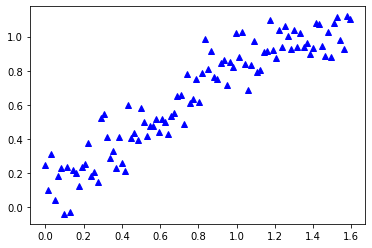

In [141]:
# 產生資料
x_train = np.linspace(0, 25, 100)[:, np.newaxis]/(5*np.pi)
noise = np.random.normal(0, 0.1, size=x_train.shape)
y_train = np.sin(x_train) + noise
print(x_train.shape)

# 畫圖
plt.figure()
plt.plot(x_train, y_train, "b^")

## 建構 Model

In [142]:
model = Sequential()
model.add(Dense(input_dim=1, units=1))

model.compile(loss='mse', optimizer=Adam(lr=0.1))

## 訓練 Model

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2755
Epoch 2/30
100/100 [==============================] - 0s 32us/step - loss: 0.0653
Epoch 3/30
100/100 [==============================] - 0s 37us/step - loss: 0.0346
Epoch 4/30
100/100 [==============================] - 0s 33us/step - loss: 0.0942
Epoch 5/30
100/100 [==============================] - 0s 26us/step - loss: 0.0991
Epoch 6/30
100/100 [==============================] - 0s 22us/step - loss: 0.0541
Epoch 7/30
100/100 [==============================] - 0s 28us/step - loss: 0.0200
Epoch 8/30
100/100 [==============================] - 0s 27us/step - loss: 0.0199
Epoch 9/30
100/100 [==============================] - 0s 32us/step - loss: 0.0355
Epoch 10/30
100/100 [==============================] - 0s 34us/step - loss: 0.0398
Epoch 11/30
100/100 [==============================] - 0s 35us/step - loss: 0.0287
Epoch 12/30
100/100 [==============================] - 0s 25us/step - loss: 0.0155
Epoch 13/30
1

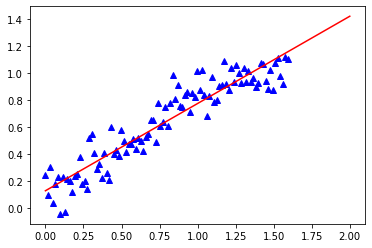

In [143]:
# 訓練
model.fit(x_train, y_train, epochs=30, batch_size=64)

# 畫圖
x_draw = np.linspace(0, 2, 100)[:,np.newaxis]
y_draw = model.predict(x_draw)
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_draw, y_draw, "r-")

## 預測新資料

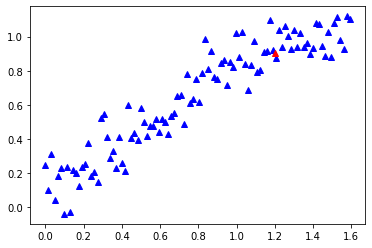

In [144]:
# 產生新資料
x_new = np.array([[1.2]])
y_new = model.predict(x_new)

# 畫圖
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_new, y_new, "r^")
plt.show()

# 範例二：Functional Model

## 資料：訓練集、標籤集

(100, 1)


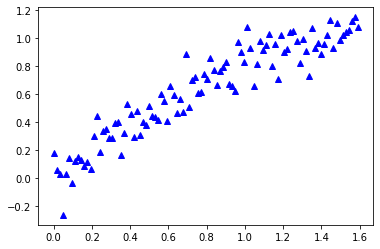

In [145]:
# 產生資料
x_train = np.linspace(0, 25, 100)[:, np.newaxis]/(5*np.pi)
noise = np.random.normal(0, 0.1, size=x_train.shape)
y_train = np.sin(x_train) + noise
print(x_train.shape)

# 畫圖
plt.figure()
plt.plot(x_train, y_train, "b^")

## 建構 Model

In [147]:
inputs = Input(shape=(1,))
predictions = Dense(1)(inputs)
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss='mse', optimizer=Adam(lr=0.1))

## 訓練

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 0.0254
Epoch 2/30
100/100 [==============================] - 0s 35us/step - loss: 0.0374
Epoch 3/30
100/100 [==============================] - 0s 60us/step - loss: 0.0175
Epoch 4/30
100/100 [==============================] - 0s 70us/step - loss: 0.0284
Epoch 5/30
100/100 [==============================] - 0s 45us/step - loss: 0.0194
Epoch 6/30
100/100 [==============================] - 0s 33us/step - loss: 0.0165
Epoch 7/30
100/100 [==============================] - 0s 37us/step - loss: 0.0208
Epoch 8/30
100/100 [==============================] - 0s 32us/step - loss: 0.0154
Epoch 9/30
100/100 [==============================] - 0s 30us/step - loss: 0.0153
Epoch 10/30
100/100 [==============================] - 0s 28us/step - loss: 0.0176
Epoch 11/30
100/100 [==============================] - 0s 37us/step - loss: 0.0148
Epoch 12/30
100/100 [==============================] - 0s 33us/step - loss: 0.0150
Epoch 13/30
1

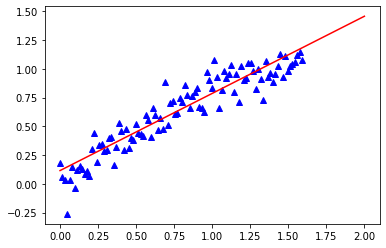

In [148]:
# 訓練
model.fit(x_train, y_train, epochs=30, batch_size=64)

# 畫圖
x_draw = np.linspace(0, 2, 100)[:,np.newaxis]
y_draw = model.predict(x_draw)
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_draw, y_draw, "r-")

# 範例三：DNN Model

## 資料：訓練集、標籤集

(100, 1)


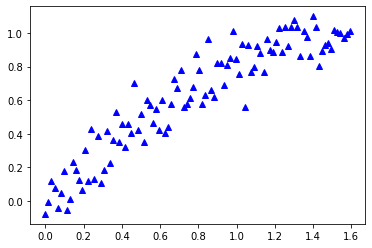

In [149]:
# 產生資料
x_train = np.linspace(0, 25, 100)[:, np.newaxis]/(5*np.pi)
noise = np.random.normal(0, 0.1, size=x_train.shape)
y_train = np.sin(x_train) + noise
print(x_train.shape)

# 畫圖
plt.figure()
plt.plot(x_train, y_train, "b^")

## 建構 Model

In [150]:
model = Sequential()
model.add(Dense(input_dim=1, units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer=Adam(lr=0.1))

## 訓練

Epoch 1/50
100/100 [==============================] - 1s 11ms/step - loss: 0.4042
Epoch 2/50
100/100 [==============================] - 0s 41us/step - loss: 1.3481
Epoch 3/50
100/100 [==============================] - 0s 48us/step - loss: 0.3532
Epoch 4/50
100/100 [==============================] - 0s 41us/step - loss: 0.3306
Epoch 5/50
100/100 [==============================] - 0s 35us/step - loss: 0.2056
Epoch 6/50
100/100 [==============================] - 0s 30us/step - loss: 0.1157
Epoch 7/50
100/100 [==============================] - 0s 32us/step - loss: 0.0637
Epoch 8/50
100/100 [==============================] - 0s 39us/step - loss: 0.0346
Epoch 9/50
100/100 [==============================] - 0s 32us/step - loss: 0.0182
Epoch 10/50
100/100 [==============================] - 0s 38us/step - loss: 0.0289
Epoch 11/50
100/100 [==============================] - 0s 33us/step - loss: 0.0367
Epoch 12/50
100/100 [==============================] - 0s 38us/step - loss: 0.0214
Epoch 13/50
1

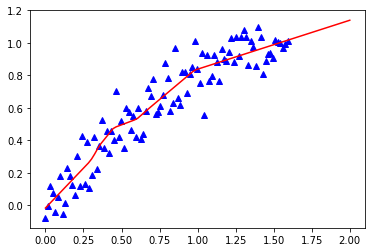

In [151]:
# 訓練
model.fit(x_train, y_train, epochs=50, batch_size=64)

# 畫圖
x_draw = np.linspace(0, 2, 100)[:,np.newaxis]
y_draw = model.predict(x_draw)
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_draw, y_draw, "r-")

# 範例四：Dropout

## 資料：訓練集、標籤集¶

(100, 1)


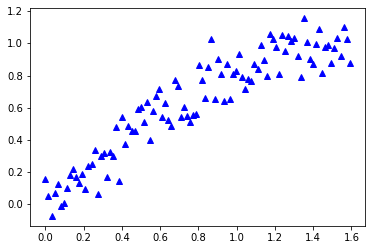

In [152]:
# 產生資料
x_train = np.linspace(0, 25, 100)[:, np.newaxis]/(5*np.pi)
noise = np.random.normal(0, 0.1, size=x_train.shape)
y_train = np.sin(x_train) + noise
print(x_train.shape)

# 畫圖
plt.figure()
plt.plot(x_train, y_train, "b^")

## 建構 Model

In [177]:
model = Sequential()
model.add(Dense(input_dim=1, units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer=Adam(lr=0.1))

## 訓練

Epoch 1/50
100/100 [==============================] - 2s 15ms/step - loss: 1.7370
Epoch 2/50
100/100 [==============================] - 0s 49us/step - loss: 0.2218
Epoch 3/50
100/100 [==============================] - 0s 63us/step - loss: 0.3308
Epoch 4/50
100/100 [==============================] - 0s 68us/step - loss: 0.2023
Epoch 5/50
100/100 [==============================] - 0s 55us/step - loss: 0.1648
Epoch 6/50
100/100 [==============================] - 0s 48us/step - loss: 0.1613
Epoch 7/50
100/100 [==============================] - 0s 48us/step - loss: 0.1339
Epoch 8/50
100/100 [==============================] - 0s 46us/step - loss: 0.1186
Epoch 9/50
100/100 [==============================] - 0s 54us/step - loss: 0.0918
Epoch 10/50
100/100 [==============================] - 0s 45us/step - loss: 0.0994
Epoch 11/50
100/100 [==============================] - 0s 39us/step - loss: 0.1016
Epoch 12/50
100/100 [==============================] - 0s 47us/step - loss: 0.0576
Epoch 13/50
1

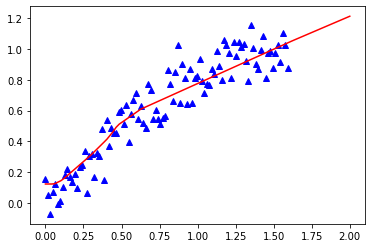

In [178]:
# 訓練
model.fit(x_train, y_train, epochs=50, batch_size=64)

# 畫圖
x_draw = np.linspace(0, 2, 100)[:,np.newaxis]
y_draw = model.predict(x_draw)
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_draw, y_draw, "r-")

## HW 練習

(200, 1)


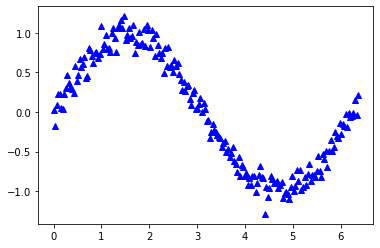

In [179]:
# 產生資料
x_train = np.linspace(0, 100, 200)[:, np.newaxis]/(5*np.pi)
noise = np.random.normal(0, 0.1, size=x_train.shape)
y_train = np.sin(x_train) + noise
print(x_train.shape)

# 畫圖
plt.figure()
plt.plot(x_train, y_train, "b^")

## 模型，練習調整參數

Epoch 1/30
200/200 [==============================] - 2s 9ms/step - loss: 0.4128
Epoch 2/30
200/200 [==============================] - 0s 39us/step - loss: 0.3618
Epoch 3/30
200/200 [==============================] - 0s 46us/step - loss: 0.3216
Epoch 4/30
200/200 [==============================] - 0s 29us/step - loss: 0.3019
Epoch 5/30
200/200 [==============================] - 0s 38us/step - loss: 0.2559
Epoch 6/30
200/200 [==============================] - 0s 37us/step - loss: 0.2223
Epoch 7/30
200/200 [==============================] - 0s 38us/step - loss: 0.2133
Epoch 8/30
200/200 [==============================] - 0s 35us/step - loss: 0.1838
Epoch 9/30
200/200 [==============================] - 0s 39us/step - loss: 0.1883
Epoch 10/30
200/200 [==============================] - 0s 35us/step - loss: 0.1753
Epoch 11/30
200/200 [==============================] - 0s 32us/step - loss: 0.1772
Epoch 12/30
200/200 [==============================] - 0s 40us/step - loss: 0.1982
Epoch 13/30
20

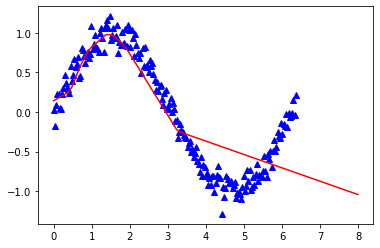

In [186]:
# 修改 Dense參數、Dropout參數
model = Sequential()
model.add(Dense(input_dim=1, units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(rate=0.0))
model.add(Dense(units=1))

# 修改 lr(learning rate)參數
model.compile(loss='mse', optimizer=Adam(lr=0.01))

# 修改 epochs參數、batch_size參數
model.fit(x_train, y_train, epochs=30, batch_size=64)

# 畫圖
x_draw = np.linspace(0, 8, 100)[:,np.newaxis]
y_draw = model.predict(x_draw)
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_draw, y_draw, "r-")